In [70]:
import pandas as pd
import matplotlib.pyplot as plt
# Seaborns geyser dataset will be used to show regression imputation
import seaborn as sns
# Scikit-learns liner_model will be used for regression imputation
from sklearn import linear_model

# The Carsales dataframe will be modified with missing values
Cardata = { "Mercedes": [2, 4, None, 4, 0, 3], "Ford": [3, 0, 0, 1, 6, 12], "Tata":[9, 3, 4, 1, 0, 0], "Renault":[12, 1, None, None, 3, 1]}
Carsales_mv = pd.DataFrame(Cardata)
Carsales_mv.index.rename("Sales place", inplace=True)
Carsales_mv.rename(index={0: "One", 1: "Two", 2: "Three", 3: "Four", 4: "Five", 5: "Six"}, inplace=True)
print(Carsales_mv)

             Mercedes  Ford  Tata  Renault
Sales place                               
One               2.0     3     9     12.0
Two               4.0     0     3      1.0
Three             NaN     0     4      NaN
Four              4.0     1     1      NaN
Five              0.0     6     0      3.0
Six               3.0    12     0      1.0


In [71]:
Carsales_null = Carsales_mv.isnull()
print(Carsales_null)

             Mercedes   Ford   Tata  Renault
Sales place                                 
One             False  False  False    False
Two             False  False  False    False
Three            True  False  False     True
Four            False  False  False     True
Five            False  False  False    False
Six             False  False  False    False


In [72]:
# null sum by column
print(Carsales_mv.isnull().sum())

Mercedes    1
Ford        0
Tata        0
Renault     2
dtype: int64


In [73]:
# for some functions missing values are dropped by default
print(Carsales_mv.describe())

       Mercedes       Ford      Tata    Renault
count   5.00000   6.000000  6.000000   4.000000
mean    2.60000   3.666667  2.833333   4.250000
std     1.67332   4.676181  3.430258   5.251984
min     0.00000   0.000000  0.000000   1.000000
25%     2.00000   0.250000  0.250000   1.000000
50%     3.00000   2.000000  2.000000   2.000000
75%     4.00000   5.250000  3.750000   5.250000
max     4.00000  12.000000  9.000000  12.000000


In [74]:
# drop any row with a missing value
Carsales2 = Carsales_mv.dropna()
print(Carsales2)

             Mercedes  Ford  Tata  Renault
Sales place                               
One               2.0     3     9     12.0
Two               4.0     0     3      1.0
Five              0.0     6     0      3.0
Six               3.0    12     0      1.0


In [75]:
# drop any column with a missing value
Carsales3 = Carsales_mv.dropna(axis=1)
print(Carsales3)

             Ford  Tata
Sales place            
One             3     9
Two             0     3
Three           0     4
Four            1     1
Five            6     0
Six            12     0


In [76]:
Carsales_zfill = Carsales_mv.fillna(0, inplace=False)
print(Carsales_zfill)

             Mercedes  Ford  Tata  Renault
Sales place                               
One               2.0     3     9     12.0
Two               4.0     0     3      1.0
Three             0.0     0     4      0.0
Four              4.0     1     1      0.0
Five              0.0     6     0      3.0
Six               3.0    12     0      1.0


In [77]:
# mean does not consider missing value in its calculation
Carsales_mean = Carsales_mv.mean()
print(Carsales_mean)

Mercedes    2.600000
Ford        3.666667
Tata        2.833333
Renault     4.250000
dtype: float64


In [78]:
Carsales_meanfill = Carsales_mv.fillna(Carsales_mean, inplace=False)
print(Carsales_meanfill)

             Mercedes  Ford  Tata  Renault
Sales place                               
One               2.0     3     9    12.00
Two               4.0     0     3     1.00
Three             2.6     0     4     4.25
Four              4.0     1     1     4.25
Five              0.0     6     0     3.00
Six               3.0    12     0     1.00


In [79]:
geyser = sns.load_dataset('geyser')
print(geyser)
geyser2=geyser.copy(deep=True)

     duration  waiting   kind
0       3.600       79   long
1       1.800       54  short
2       3.333       74   long
3       2.283       62  short
4       4.533       85   long
..        ...      ...    ...
267     4.117       81   long
268     2.150       46  short
269     4.417       90   long
270     1.817       46  short
271     4.467       74   long

[272 rows x 3 columns]


In [80]:
nlist1 = [4, 14, 35, 16, 73]
nlist2 = [7, 21, 53, 63, 43]

for n in nlist1:
    geyser2.loc[n, 'duration'] = None

for n in nlist2:
    geyser2.loc[n, 'waiting'] = None

geyser3 = geyser2.copy()

         duration     waiting
count  267.000000  267.000000
mean     3.489427   70.906367
std      1.138907   13.564751
min      1.600000   43.000000
25%      2.167000   58.000000
50%      4.000000   76.000000
75%      4.450000   82.000000
max      5.100000   96.000000
         duration     waiting
count  272.000000  272.000000
mean     3.477182   70.781250
std      1.134215   13.530441
min      1.600000   43.000000
25%      2.167000   58.000000
50%      3.966500   75.500000
75%      4.450000   82.000000
max      5.100000   96.000000


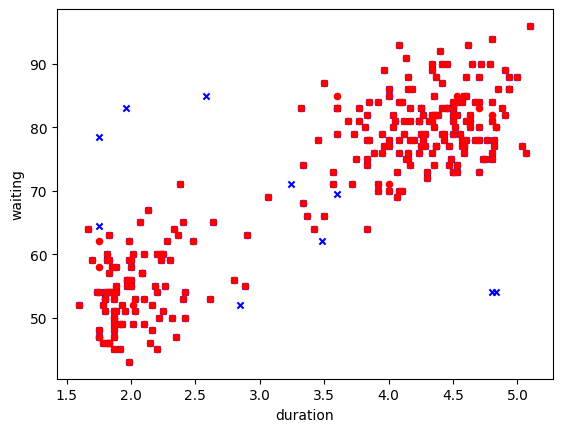

In [81]:
# interpolates values based off a given model like a linear line
geyser2 = geyser2.infer_objects(copy=False)
print(geyser2.describe())
geyser2['duration'] = geyser2['duration'].interpolate(method='linear')
geyser2['waiting'] = geyser2['waiting'].interpolate(method='linear')
print(geyser2.describe())

fig, ax = plt.subplots()
geyser2.plot.scatter(x='duration', y='waiting', color='Blue', marker='x', ax=ax)
geyser.plot.scatter(x='duration', y='waiting', color='Red', marker='o', ax=ax)
plt.show()

In [82]:
geyser4 = geyser3.dropna()
model_1 = linear_model.LinearRegression()
model_2 = linear_model.LinearRegression()

model_1.fit(X=geyser4[['duration']], y=geyser4[['waiting']])
model_2.fit(X=geyser4[['waiting']], y=geyser4[['duration']])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
geyser3['waiting'] = geyser3['waiting'].fillna(10000)
geyser3['duration'] = geyser3['duration'].fillna(10000)

print(geyser3.isna().sum())

duration    0
waiting     0
kind        0
dtype: int64


In [86]:
geyser3['est_waiting']= model_1.predict(geyser3[['duration']])
geyser3['est_duration']= model_2.predict(geyser3[['waiting']])

geyser3.loc[geyser3['duration'] >= 10000, 'duration'] = geyser3['est_duration']
geyser3.loc[geyser3['waiting'] >= 10000, 'waiting'] = geyser3['est_waiting']
print(geyser3)

     duration  waiting   kind    est_waiting  est_duration
0    3.600000     79.0   long      72.077005      4.100531
1    1.800000     54.0  short      52.636328      2.219984
2    3.333000     74.0   long      69.193305      3.724422
3    2.283000     62.0  short      57.852910      2.821759
4    4.551863     85.0   long  108036.961219      4.551863
..        ...      ...    ...            ...           ...
267  4.117000     81.0   long      77.660800      4.250975
268  2.150000     46.0  short      56.416459      1.618208
269  4.417000     90.0   long      80.900913      4.927972
270  1.817000     46.0  short      52.819934      1.618208
271  4.467000     74.0   long      81.440932      3.724422

[272 rows x 5 columns]


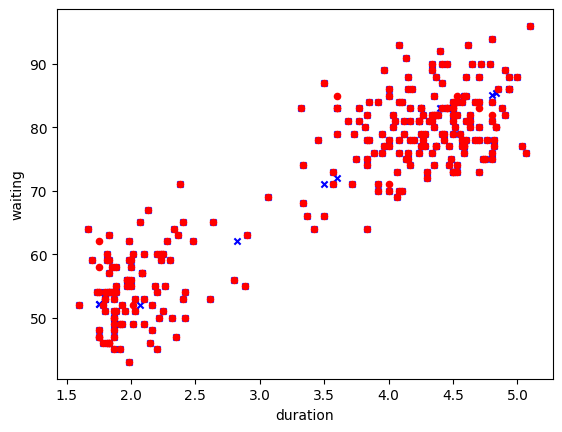

In [87]:
fig, ax = plt.subplots()
geyser3.plot.scatter(x='duration', y='waiting', color='Blue', marker='x', ax=ax)
geyser.plot.scatter(x='duration', y='waiting', color='Red', marker='o', ax=ax)
plt.show()